In [18]:
import seaborn as sns

In [19]:
import pandas as pd

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from plotting import *

In [22]:
cits = pd.read_csv("./classified.csv")
cits["PhD Age"] = 2020 - cits["Earliest_Pub"]
cits["cit/year13"] = cits["Citations"]/cits["PhD Age"]**1.3

In [23]:
cits.info()
cits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
Name            2807 non-null object
School          2807 non-null object
Gender          2807 non-null object
Role            2807 non-null object
Citations       2807 non-null float64
Earliest_Pub    2807 non-null float64
Field_1         2807 non-null object
Field_2         237 non-null object
Major field     2807 non-null object
PhD Age         2807 non-null float64
cit/year13      2807 non-null float64
dtypes: float64(4), object(7)
memory usage: 88.0+ MB


,Name,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,PhD Age,cit/year13
0,Matthias Kawski,Arizona State University,Male,Professor,223.0,1986.0,Systems theory; control,NaN,Applied Math,34.0,2.277101
1,Robert McCulloch,Arizona State University,Male,Professor,148.0,1985.0,Statistics,NaN,Statistics,35.0,1.455369
2,Carl Gardner,Arizona State University,Male,Professor,172.0,1983.0,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,37.0,1.573498
3,Sergei Suslov,Arizona State University,Male,Professor,703.0,1982.0,Special functions,NaN,Analysis,38.0,6.212074
4,Al Boggess,Arizona State University,Male,Professor,346.0,1979.0,Several complex variables and analytic spaces,NaN,Complex Analysis,41.0,2.769855
...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
citsess = cits[['Name', 'School','Gender', 'cit/year13', 'PhD Age','Major field']]

In [25]:
citsess.columns = ['Name', 'School','Gender', 'citsnorm', 'Age','field']

In [26]:
women = citsess[citsess.Gender=='Female']

In [27]:
men = citsess[citsess.Gender=='Male']

In [28]:
qqplot(men.citsnorm, women.citsnorm)

NameError: name 'qqplot' is not defined

In [30]:
import scipy.stats as sss
%matplotlib inline

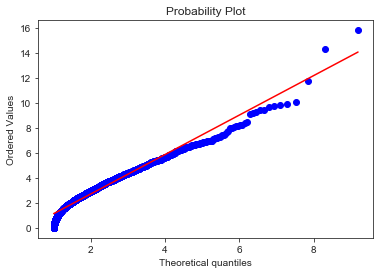

In [31]:
fig = plt.figure()
ax = plt.subplot(111)
sss.probplot(men.citsnorm**0.5, dist=sss.expon, sparams=1.0, plot=ax)
plt.show()

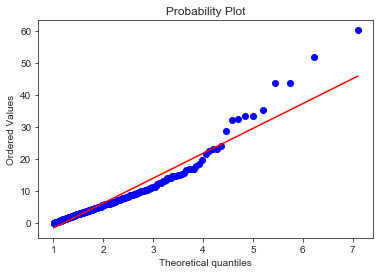

In [29]:
fig = plt.figure()
ax = plt.subplot(111)
sss.probplot(women.citsnorm, dist=sss.expon, sparams=1.0, plot=ax)
plt.show()

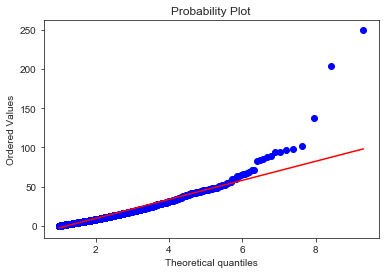

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
sss.probplot(citsess.citsnorm, dist=sss.expon, sparams=1.0, plot=ax)
plt.show()

In [33]:
cits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 11 columns):
Name            2807 non-null object
School          2807 non-null object
Gender          2807 non-null object
Role            2807 non-null object
Citations       2807 non-null int64
Earliest_Pub    2807 non-null int64
Field_1         2807 non-null object
Field_2         237 non-null object
Major field     2807 non-null object
PhD Age         2807 non-null int64
cit/year13      2807 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 241.4+ KB


In [34]:
ageprog = men.groupby('Age').mean()

In [35]:
ageprog

,citsnorm
Age,
7,10.040217
8,12.928267
9,2.299030
10,12.441973
11,5.726641
12,19.067405
13,14.374165
14,12.135700
15,15.697936


In [36]:
ageprog2 = ageprog.reset_index()

In [37]:
ageprog2

,Age,citsnorm
0,7,10.040217
1,8,12.928267
2,9,2.299030
3,10,12.441973
4,11,5.726641
5,12,19.067405
6,13,14.374165
7,14,12.135700
8,15,15.697936
9,16,8.786553


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
mreg = LinearRegression()

In [40]:
mreg.fit(ageprog2[['Age']], ageprog2['citsnorm'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
mreg.coef_

array([0.07931446])

In [42]:
fageprog = women.groupby('Age').mean().reset_index()

In [43]:
freg = LinearRegression()

In [44]:
freg.fit(fageprog[['Age']], fageprog['citsnorm'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
freg.coef_

array([-0.0457705])

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
dflist = []

In [48]:
for i, j in citsess.groupby('field'):
    #display(j)
    ss = StandardScaler()
    newcol = ss.fit_transform(j[['citsnorm']])
    newercol = pd.DataFrame(newcol, columns = ['zscore'], index=j.index)
    #display(newercol)
    #display(newercol.info())
    newdf = pd.concat([j, newercol], axis=1)
    dflist.append(newdf)

In [49]:
standardized = pd.concat(dflist)

In [50]:
standardized.head()


,Name,School,Gender,citsnorm,Age,field,zscore
33,Thomas Pate,Auburn University,Male,0.766833,44,Algebra,-0.809696
49,Overtoun Jenda,Auburn University,Male,14.813753,39,Algebra,0.519340
54,Alex Feingold,Binghamton University,Male,2.106925,43,Algebra,-0.682905
100,Kiyoshi Igusa,Brandeis University,Male,5.035373,41,Algebra,-0.405832
112,Jeremy Kahn,Brown University,Male,2.385812,29,Algebra,-0.656518


In [70]:
for x in standardized.field.unique():
    fjj = standardized[standardized.field == x]["zscore"]
    print(x, np.std(fjj))

Algebra 1.0000000000000002
Algebraic Geometry 1.0000000000000002
Analysis 1.0
Applied Math 1.0000000000000002
Combinatorics 0.9999999999999998
Complex Analysis 1.0000000000000002
Computer Science 0.9999999999999996
Dynamics 0.9999999999999999
Geometry 0.9999999999999999
Group theory 0.9999999999999998
Harmonic analysis 1.0000000000000002
History 1.0
Lie Groups 0.9999999999999998
Logic 1.0
Mathematical Physics 1.0
Number theory 0.9999999999999997
Other 0.9999999999999999
PDE 0.9999999999999998
Probability 1.0
Statistics 1.0


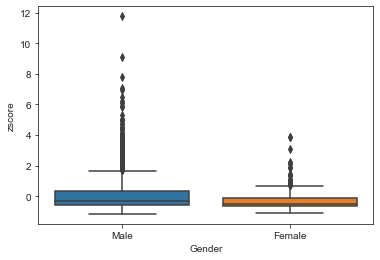

In [51]:
sns.boxplot(x="Gender", y="zscore", data = standardized)

In [52]:
for i, j in standardized.groupby('Gender'):
    display(j.describe())

,citsnorm,Age,zscore
count,310.000000,310.000000,310.000000
mean,6.185260,27.883871,-0.292968
std,7.878863,9.120165,0.650715
min,0.000000,10.000000,-1.124750
25%,1.540643,21.000000,-0.647005
50%,3.798123,27.000000,-0.487212
75%,7.649517,34.000000,-0.114155
max,60.115125,53.000000,3.899133


,citsnorm,Age,zscore
count,2497.000000,2497.000000,2497.000000
mean,9.924545,33.599920,0.036372
std,13.314503,11.194044,1.029658
min,0.000000,7.000000,-1.160355
25%,2.589171,25.000000,-0.592895
50%,5.999998,33.000000,-0.298633
75%,12.646909,41.000000,0.314795
max,249.352048,70.000000,11.771926


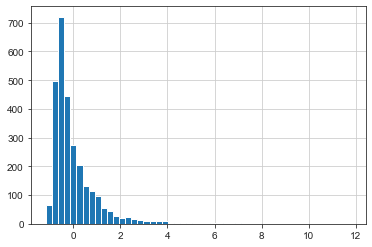

In [53]:
standardized.zscore.hist(bins=50)

In [54]:
byschool = standardized.groupby('School').zscore.mean().sort_values( ascending=False)

In [55]:
byschool.head(30)

School
Princeton University                           1.783770
Harvard University                             1.486720
Stanford University                            1.020148
University of Chicago                          0.952809
Columbia University in the City of New York    0.915703
Massachusetts Institute of Technology          0.866242
University of California, Los Angeles          0.831819
University of Miami                            0.778585
Yale University                                0.692415
Brown University                               0.615732
New York University                            0.590891
University of California, Berkeley             0.584864
University of Oregon                           0.531428
California Institute of Technology             0.426689
Duke University                                0.399099
Stony Brook University                         0.394544
Rutgers University-New Brunswick               0.322856
University of Virginia                   

In [56]:
byschool.tail(30)

School
West Virginia University               -0.450212
Auburn University                      -0.456050
The University of Texas at Arlington   -0.461850
Texas Tech University                  -0.465511
University of Arizona                  -0.471194
Binghamton University                  -0.473463
University of New Mexico               -0.488009
The University of Alabama              -0.490595
The University of Texas at Dallas      -0.502933
University of Oklahoma                 -0.503402
George Mason University                -0.505426
Florida Institute University           -0.507289
Oklahoma State University              -0.511426
Case Western Reserve University        -0.511967
University of Colorado Boulder         -0.513346
University of Hawaii at Manoa          -0.514470
University of Alabama at Birmingham    -0.516542
Kansas State University                -0.519936
Drexel University                      -0.523898
Temple University                      -0.525127
Oregon State 

In [57]:
standardized.sort_values(by=['zscore'], ascending=False).head(300)

,Name,School,Gender,citsnorm,Age,field,zscore
1592,Terence Tao,"University of California, Los Angeles",Male,249.352048,24,PDE,11.771926
2805,Chi-Wang Shu,Brown University,Male,203.969014,34,Computer Science,9.124381
508,Shing-Tung Yau,Harvard University,Male,88.105181,50,Geometry,7.789313
1517,Bernd Sturmfels,"University of California, Berkeley",Male,83.803439,34,Algebra,7.046736
950,Noga Alon,Princeton University,Male,94.324480,39,Combinatorics,6.925867
...,...,...,...,...,...,...,...
2142,Chris Cosner,University of Miami,Male,16.851287,41,Applied Math,1.056778
2694,Glenn Webb,Vanderbilt University,Male,16.839154,52,Applied Math,1.055488
2618,James Burke,University of Washington,Male,16.796177,37,Applied Math,1.050919
498,Yum Tong Siu,Harvard University,Male,12.786284,55,Complex Analysis,1.047328


In [58]:
standardized[standardized.Gender=='Female'].sort_values(by=['zscore'], ascending=False).head(60)

,Name,School,Gender,citsnorm,Age,field,zscore
1617,Andrea Bertozzi,"University of California, Los Angeles",Female,43.586504,32,Applied Math,3.899133
362,Ingrid Daubechies,Duke University,Female,51.619658,43,Harmonic analysis,3.898988
724,Sylvia Serfaty,New York University,Female,32.206691,22,Mathematical Physics,3.056908
601,Susanne Brenner,Louisiana State University and Agricultural&Me...,Female,60.115125,32,Computer Science,2.212023
1794,Nageswari Shanmugalingam,University of Cincinatti,Female,32.380580,21,Harmonic analysis,2.075021
948,Maria Chudnovsky,Princeton University,Female,33.426335,18,Combinatorics,1.919087
155,Irene Fonseca,Carnegie Mellon University,Female,23.974262,35,Applied Math,1.814057
1591,Monica Visan,"University of California, Los Angeles",Female,43.550102,15,PDE,1.446822
221,Dusa McDuff,Columbia University in the City of New York,Female,22.598219,51,Geometry,1.352972
1639,Vyjayanthi Chari,"University of California, Riverside",Female,23.121635,36,Algebra,1.305383


In [59]:
standardized.sort_values(by=['zscore'], ascending=False).tail(300)

,Name,School,Gender,citsnorm,Age,field,zscore
1371,Zalman Balanov,The University of Texas at Dallas,Male,2.720750,36,Harmonic analysis,-0.736889
2323,Kevin Short,University of New Hampshire,Male,0.023028,31,PDE,-0.736935
370,Kirsten G Wickelgren,Duke University,Female,2.248511,15,Algebraic Geometry,-0.737167
1907,Michelle Manes,University of Hawaii at Manoa,Female,2.815145,13,Dynamics,-0.738211
315,Saeed Zakeri,CUNY Graduate School and University Center,Male,2.805273,22,Dynamics,-0.739809
...,...,...,...,...,...,...,...
704,Elizabeth Burroughs,Montana State University,Female,0.427430,17,Dynamics,-1.124750
2318,Ilya Zaliapin,"University of Nevada, Reno",Male,0.267450,21,Dynamics,-1.150649
1715,Frank Bauerle,"University of California, Santa Cruz",Male,0.043417,26,Logic,-1.154378
1152,John A Paulos,Temple University,Male,0.020679,46,Logic,-1.158561


In [60]:
standardized[standardized.Gender=='Female'].sort_values(by=['zscore'], ascending=False).tail(45)

,Name,School,Gender,citsnorm,Age,field,zscore
203,Colleen Webb,Colorado State University,Female,0.000000,19,Applied Math,-0.734767
370,Kirsten G Wickelgren,Duke University,Female,2.248511,15,Algebraic Geometry,-0.737167
1907,Michelle Manes,University of Hawaii at Manoa,Female,2.815145,13,Dynamics,-0.738211
2435,Antonella Grassi,University of Pennsylvania,Female,1.204923,34,Mathematical Physics,-0.744577
2324,Rita Hibschweiler,University of New Hampshire,Female,1.458408,32,Complex Analysis,-0.746094
2061,Ewa Kubicka,University of Louisville,Female,0.978698,31,Combinatorics,-0.748617
1547,Mariel Vazquez,"University of California, Davis",Female,1.115393,16,Geometry,-0.757808
848,Leticia Barchini,Oklahoma State University,Female,1.317699,35,Lie Groups,-0.757873
267,Antonia Foldes,CUNY Graduate School and University Center,Female,2.692223,49,Probability,-0.762558
1810,Jeanne Nielsen Clelland,University of Colorado Boulder,Female,1.059911,24,Geometry,-0.763259


In [61]:
import scipy.stats as stats

In [62]:
import random

In [63]:
import copy

In [64]:
gT = standardized[standardized.Gender=='Male'].zscore.mean() - standardized[standardized.Gender=='Female'].zscore.mean()

In [65]:
gT

0.32933969547495634

In [66]:
pS = standardized.zscore.copy()

In [51]:
pD = []

In [52]:
p = 10000

In [53]:
for i in range(p):
    random.shuffle(pS)
    pD.append(np.abs(pS.iloc[:310].mean() - pS.iloc[310:].mean()))

In [54]:
pD

[0.1839614673186456,
 0.06803183422254622,
 0.054225643696840464,
 0.0034207534971101485,
 0.01576495621976562,
 0.0009746860686332334,
 0.07467565018455645,
 0.008690193539964109,
 0.04745973843328108,
 0.012612060543789294,
 0.04779923703535007,
 0.03477327854493651,
 0.07470630297252835,
 0.10340866877928459,
 0.0794999313693004,
 0.012692197025497703,
 0.014042326622120573,
 0.031215782902669176,
 0.008100810775054909,
 0.02435847636994751,
 0.04357745108256362,
 0.1211846721161898,
 0.049990332168761434,
 0.04465491117926497,
 0.009933073078695244,
 0.01455721656339004,
 0.02340482383335724,
 0.0037938152583564576,
 0.002121516677723937,
 0.060588114774042155,
 0.014246410000136999,
 0.029504022101450172,
 0.03371057008608696,
 0.013411137256978494,
 0.033030189388692115,
 0.0001182796741967675,
 0.011941988323682129,
 0.002407357440134715,
 9.626115778773358e-05,
 0.04732878126939945,
 0.014760601321573119,
 0.026955526376721408,
 0.019894073210790505,
 0.004020600565071374,
 0.0

In [55]:
np.max(pD)

0.22131354301251735

In [ ]:
pDser = pd.Series(pD)

In [ ]:
pDser.hist(bins=50)